### Student Information
Name: 洪偵耀

Student ID: 111033402

GitHub ID: zyao5699

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

### Begin Assignment Here

In [253]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## First
in the DM2022-Lab1-Master.

## Second
Follow the same process from the DM2022-Lab1-Master on the new dataset. 

## 1, 2, 3. Data Source, Preparation, Transformation
The Sentiment Labelled Sentences Data Set are stored in three seperated text files. With pandas, we can fetch these data set and combine them into one

In [254]:
# fetch data set and construct dataframe with pandas
import pandas as pd

df_amazon = pd.read_csv("./dataset/sentiment labelled sentences/amazon_cells_labelled.txt",
                  sep='\t', header=None, names=['sentence', 'score'])
df_imdb = pd.read_csv("./dataset/sentiment labelled sentences/imdb_labelled.txt",
                  sep='\t', quotechar="\'", header=None, names=['sentence', 'score'])
df_yelp = pd.read_csv("./dataset/sentiment labelled sentences/yelp_labelled.txt",
                  sep='\t', header=None, names=['sentence', 'score'])
df = pd.concat([df_amazon, df_imdb, df_yelp], axis = 0, ignore_index = True)
df

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


### 3.2 Familiarizing yourself with the Data

In [255]:
# using loc (by label)
df.loc[:10, 'sentence']

0     So there is no way for me to plug it in here i...
1                           Good case, Excellent value.
2                                Great for the jawbone.
3     Tied to charger for conversations lasting more...
4                                     The mic is great.
5     I have to jiggle the plug to get it to line up...
6     If you have several dozen or several hundred c...
7           If you are Razr owner...you must have this!
8                   Needless to say, I wasted my money.
9                      What a waste of money and time!.
10                      And the sound quality is great.
Name: sentence, dtype: object

In [256]:
# using iloc (by position)
df.iloc[:10, 0]

0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
3    Tied to charger for conversations lasting more...
4                                    The mic is great.
5    I have to jiggle the plug to get it to line up...
6    If you have several dozen or several hundred c...
7          If you are Razr owner...you must have this!
8                  Needless to say, I wasted my money.
9                     What a waste of money and time!.
Name: sentence, dtype: object

In [257]:
# Excercise 3
# fetch records which score = 0, and query every 10th record. Only show the first 5 records.
df[df["score"] == 0].iloc[::10][0:5]

,sentence,score
0,So there is no way for me to plug it in here i...,0
20,I went on Motorola's website and followed all ...,0
37,Poor Talk Time Performance.,0
60,Essentially you can forget Microsoft's tech su...,0
83,The battery runs down quickly.,0


## 4. Data Mining using Pandas

### 4.1 Missing Values

In [258]:
# check missing values
df.isnull()

,sentence,score
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2995,False,False
2996,False,False
2997,False,False
2998,False,False


In [259]:
# check missing values of every column with data_mining_helpers
import helpers.data_mining_helpers as dmh

df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [260]:
# Excercise 4
# calculate the missing values in every record instead of every column.
df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

insert a dummy series contains missing value, then check if exist missing value. 

In [261]:
dummy_series = pd.Series(["dummy_record"], index=["sentence"])
dummy_series.to_frame().T

,sentence
0,dummy_record


In [262]:
result_with_series = pd.concat([df, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

3001

In [263]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,1


insert a dummy record as dictionary format and check again.

In [264]:
dummy_dict = [{'score': 1}]

In [265]:
df = pd.concat([df, pd.DataFrame(dummy_dict)], ignore_index=True)
len(df)

3001

In [266]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,1,0


So now that we can see that our data has missing values, we want to remove the records with missing values. The code to drop the record with missing that we just added, is the following:

In [267]:
df.dropna(inplace=True)
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score
0,The amoung of missing records is:,The amoung of missing records is:
1,0,0


In [268]:
len(df)

3000

### 4.2 Dealing with Duplicate Data

In [269]:
# check duplicated values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [270]:
sum(df.duplicated())

17

In [271]:
sum(df.duplicated('sentence'))

17

Our dataset contains a lot of duplicates, we would keep the first data of duplicates and drop the others.

In [272]:
df.drop_duplicates(keep='first', inplace=True) # inplace applies changes directly on our dataframe

In [273]:
len(df)

2983

In [274]:
df

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [275]:
df.score.value_counts()

0    1493
1    1490
Name: score, dtype: int64

The data are now clean and still in balance.

## 5.  Data Preprocessing

### 5.1 Sampling
we want a smaller subset of the data that is still representatitive enough as compared to the original dataset. 

In [276]:
df_sample = df.sample(n = 300)

In [277]:
len(df_sample)

300

In [278]:
df_sample[0:4]

,sentence,score
149,"After 3 months, screen just went black all of ...",0
229,I ordered this for sony Ericsson W810i but I t...,0
2363,Definitely a turn off for me & i doubt I'll be...,0
2778,My girlfriend's veal was very bad.,0


Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use matplotlib python library.

In [279]:
import matplotlib.pyplot as plt
%matplotlib inline

0    1493
1    1490
Name: score, dtype: int64


<AxesSubplot:title={'center':'Score distribution'}>

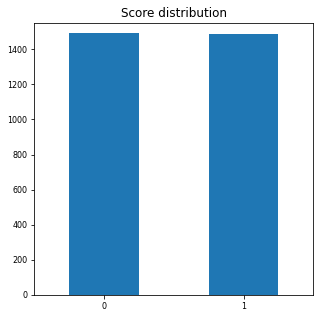

In [280]:
print(df.score.value_counts())
df.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, 1550],        
                                    rot = 0, fontsize = 8, figsize = (5,5))

0    152
1    148
Name: score, dtype: int64


<AxesSubplot:title={'center':'Score distribution'}>

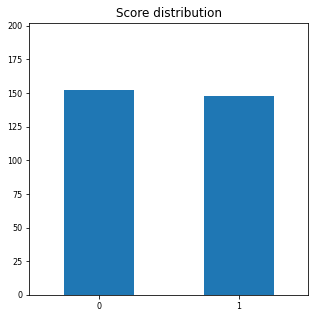

In [281]:
print(df_sample.score.value_counts())
upper_bound = max(df_sample.score.value_counts()) + 50
df_sample.score.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, upper_bound],        
                                    rot = 0, fontsize = 8, figsize = (5,5))

### 5.2 Feature Creation
In feature creation we are looking at creating new interesting and useful features from the original dataset; a feature which captures the most important information from the raw information we already have access to. In our `df` table, we would like to create some features from the `sentence` field.

First, we are going to obtain the **unigrams** for each text and append it as a new feature to the pandas dataframe.

In [282]:
import nltk

In [283]:
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))

In [284]:
df[0:4]

,sentence,score,unigrams
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin..."


In [285]:
list(df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 5.3 Feature subset selection
We are going to generate a document-term matrix from the original dataset.

In [286]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_features = 100) #only plot the top 100 freq terms
df_counts = count_vect.fit_transform(df.sentence) #learn the vocabulary and return document-term matrix
print(df_counts[0])

  (0, 69)	1
  (0, 76)	1
  (0, 42)	1
  (0, 55)	1
  (0, 28)	1
  (0, 48)	1
  (0, 80)	1
  (0, 43)	1
  (0, 41)	2
  (0, 38)	1
  (0, 74)	1
  (0, 31)	1
  (0, 18)	1


We can create our own analyzers or even use the nltk analyzer that we previously built. To keep things tidy and minimal we are going to use the default analyzer provided by CountVectorizer.

In [287]:
analyze = count_vect.build_analyzer()
analyze(df.sentence[0])

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [288]:
df_counts.shape

(2983, 100)

In [289]:
# We can obtain the feature names of the vectorizer, i.e., the terms
count_vect.get_feature_names_out()

array(['about', 'after', 'all', 'also', 'an', 'and', 'any', 'are', 'as',
       'at', 'back', 'bad', 'be', 'because', 'been', 'best', 'better',
       'but', 'by', 'can', 'could', 'do', 'don', 'even', 'ever',
       'excellent', 'film', 'food', 'for', 'from', 'get', 'go', 'good',
       'great', 'had', 'has', 'have', 'he', 'here', 'how', 'if', 'in',
       'is', 'it', 'just', 'like', 'love', 'made', 'me', 'more', 'movie',
       'much', 'my', 'never', 'nice', 'no', 'not', 'of', 'on', 'one',
       'only', 'or', 'out', 'phone', 'place', 'product', 'quality',
       'really', 'service', 'so', 'some', 'sound', 'than', 'that', 'the',
       'their', 'there', 'they', 'this', 'time', 'to', 'too', 'up', 've',
       'very', 'was', 'we', 'well', 'were', 'what', 'when', 'which',
       'who', 'will', 'with', 'work', 'works', 'would', 'you', 'your'],
      dtype=object)

In [290]:
# we convert from sparse array to normal array
df_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [291]:
# first hundred features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:100]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:100]]
plot_z = df_counts[0:100, 0:100].toarray()
plot_z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

For the heat map, we are going to use another visualization library called seaborn.

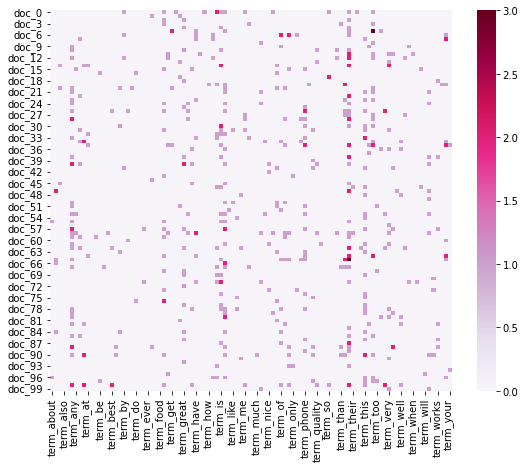

In [292]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=3, annot=False)

### 5.4 Dimensionality Reduction
We are going to make use of Principal Component Analysis to efficiently reduce the dimensions of our data, with the main goal of "finding a projection that captures the largest amount of variation in the data." This concept is important as it is very useful for visualizing and observing the characteristics of our dataset. 

In [293]:
from sklearn.decomposition import PCA

In [294]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())

<IPython.core.display.Javascript object>


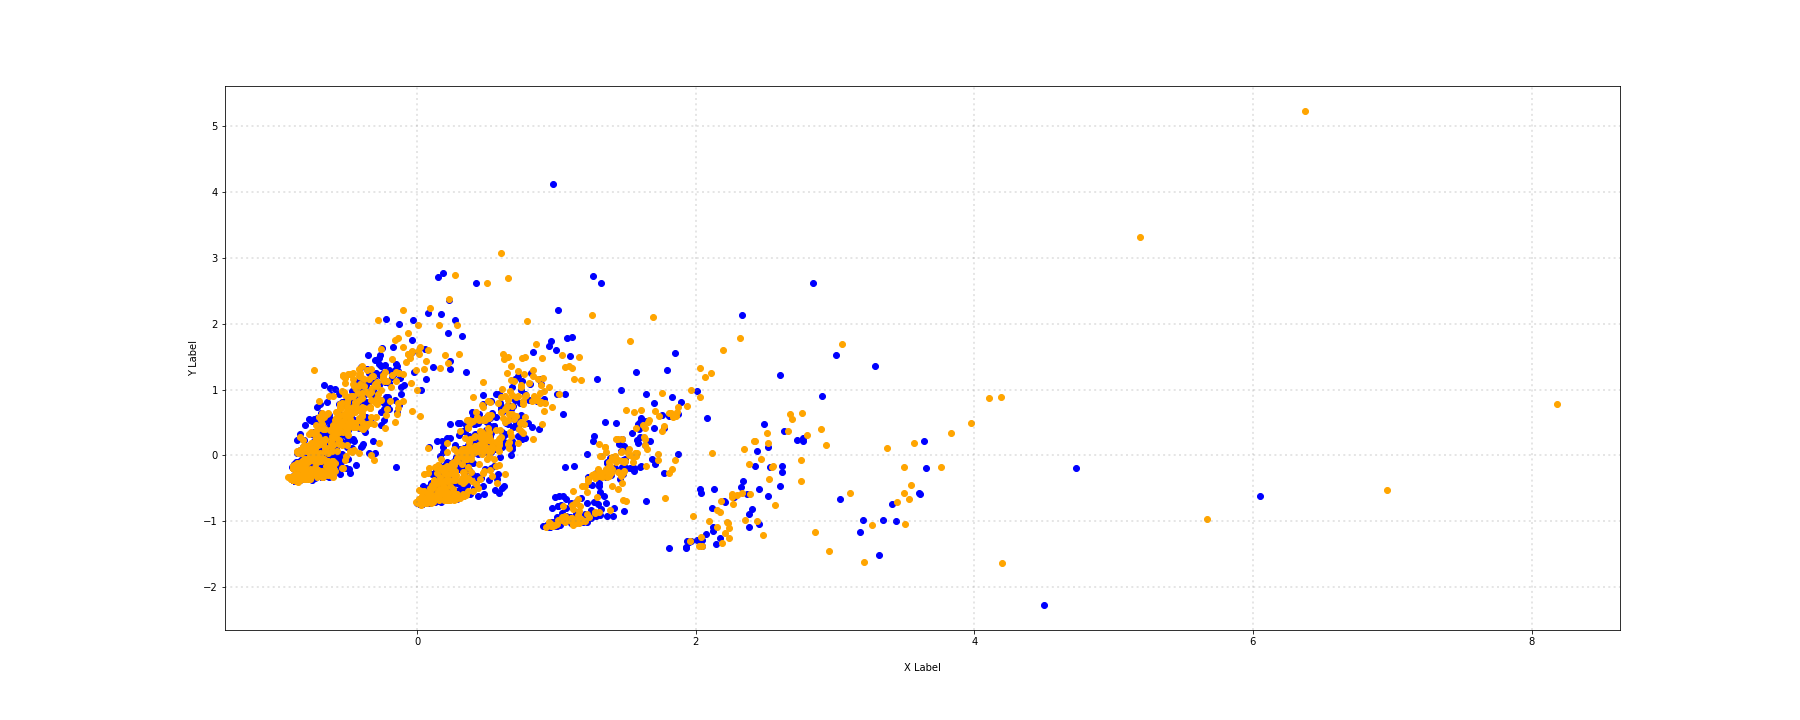

In [295]:
%matplotlib notebook 
# to interact with the matplot

col = ['blue', 'orange']
scores = [0, 1]

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, scores):
    xs = df_reduced[df['score'] == score].T[0]
    ys = df_reduced[df['score'] == score].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

Below also reduce the dimension to 3, and plot the result use 3-D plot.

<IPython.core.display.Javascript object>


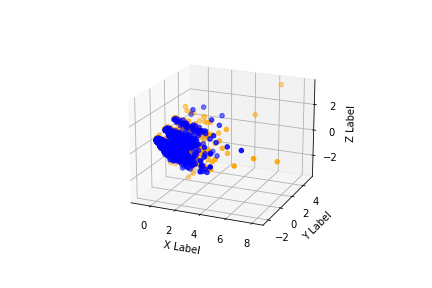

In [296]:
df_reduced_3D = PCA(n_components = 3).fit_transform(df_counts.toarray())
scores = [0, 1]
col = ['blue', 'orange']

# plot
ax = plt.figure().add_subplot(projection='3d')

for c, score in zip(col, scores):
    xs = df_reduced_3D[df['score'] == score].T[0]
    ys = df_reduced_3D[df['score'] == score].T[1]
    zs = df_reduced_3D[df['score'] == score].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

From above plots, we can observe that there are about three main group. I personally think this is mainly due to the data come from three seperate dataset. Also, there is no immediately clear seperation in data.

### 5.5 Attribute Transformation / Aggregation
On the topic of attribute transformation, we will take the word distribution and put the distribution in a scale that makes it easy to analyze patterns in the distrubution of words. Also, we will do aggregation which compute these frequencies for each term in all documents.

In [297]:
import numpy as np

term_frequencies = []
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

In [298]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]

<IPython.core.display.Javascript object>


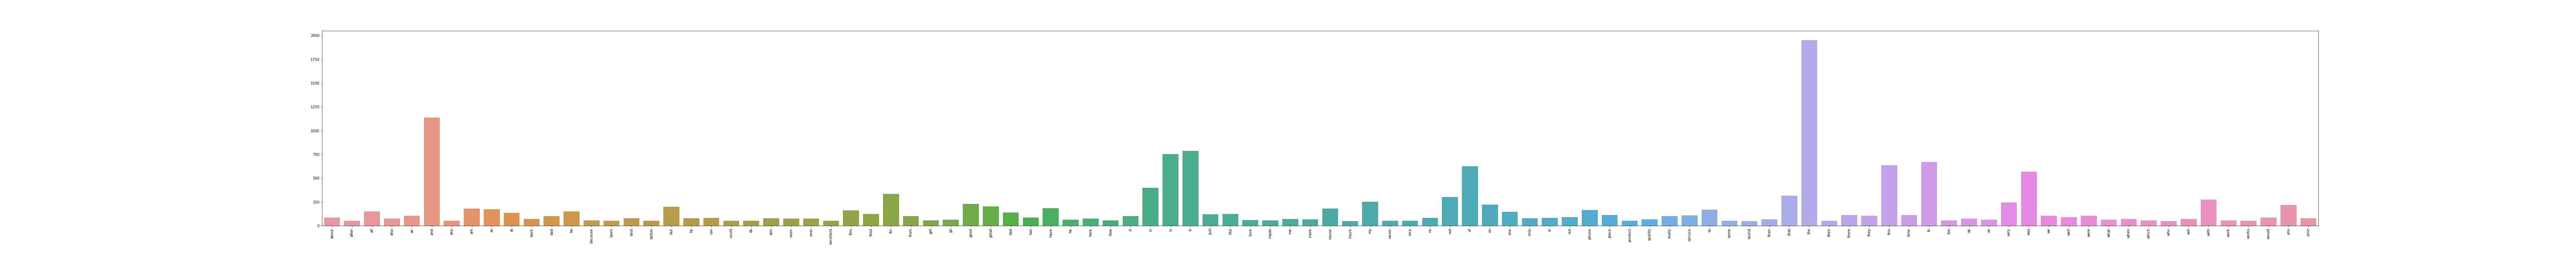

In [299]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [300]:
# Also display in log scale for easier visualization
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

<IPython.core.display.Javascript object>


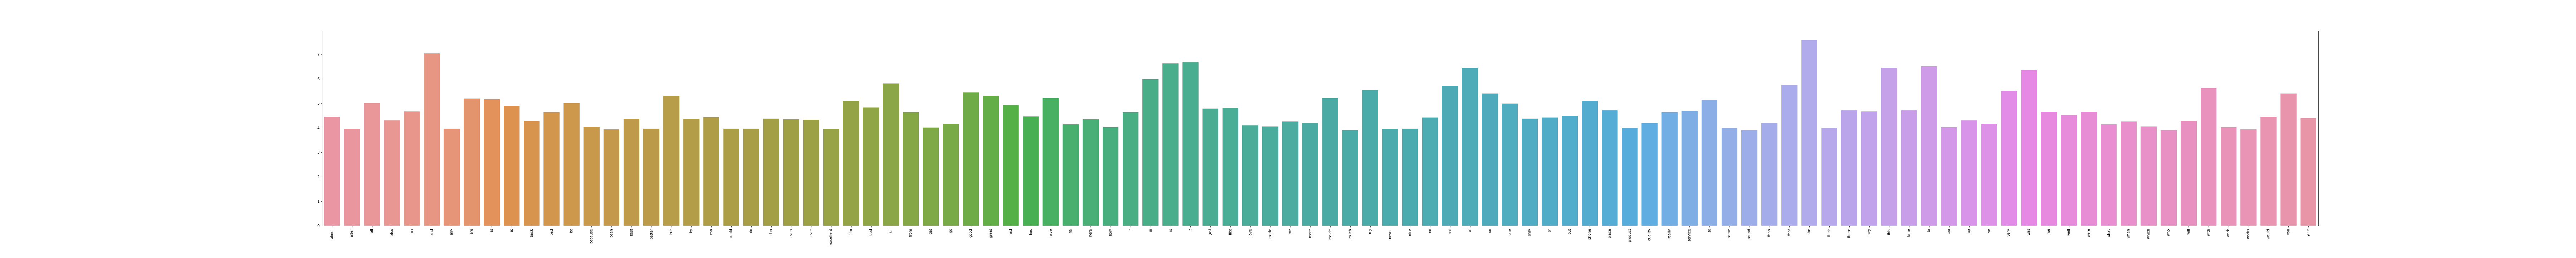

In [301]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### 5.6 Discretization and Binarization
we would like to transform the score into binary attributes.

In [302]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [303]:
mlb = preprocessing.LabelBinarizer()

In [304]:
mlb.fit(df.score)

LabelBinarizer()

In [305]:
df['bin_score'] = mlb.transform(df['score']).tolist()

In [306]:
df[0:9]

,sentence,score,unigrams,bin_score
0,So there is no way for me to plug it in here i...,0,"[So, there, is, no, way, for, me, to, plug, it...",[0]
1,"Good case, Excellent value.",1,"[Good, case, ,, Excellent, value, .]",[1]
2,Great for the jawbone.,1,"[Great, for, the, jawbone, .]",[1]
3,Tied to charger for conversations lasting more...,0,"[Tied, to, charger, for, conversations, lastin...",[0]
4,The mic is great.,1,"[The, mic, is, great, .]",[1]
5,I have to jiggle the plug to get it to line up...,0,"[I, have, to, jiggle, the, plug, to, get, it, ...",[0]
6,If you have several dozen or several hundred c...,0,"[If, you, have, several, dozen, or, several, h...",[0]
7,If you are Razr owner...you must have this!,1,"[If, you, are, Razr, owner, ..., you, must, ha...",[1]
8,"Needless to say, I wasted my money.",0,"[Needless, to, say, ,, I, wasted, my, money, .]",[0]


since score is binary originally, thus its same after transforming to binary attributes.

### 6. Data Exploration
Sometimes you need to take a peek at your data to understand the relationships in your dataset. Here, we will focus in a similarity example. Below will take 3 documents and compare them.

In [307]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = df.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = df.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = df.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

In [308]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [309]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


In [310]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


As expected, these sentences are too short, no common feature in any two different sentences thus their cosine similarity are both 0. 

## Third: please attempt the following tasks on the new dataset.
1. Generate meaningful new data visualizations.
2. Generate TF-IDF features from the tokens of each text.
3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

### 1. Below will create wordcloud and piechart visualization.

<IPython.core.display.Javascript object>


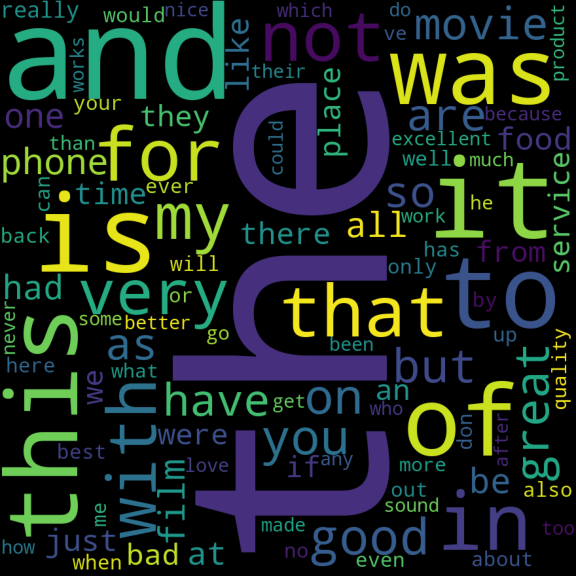

In [311]:
#create wordcloud visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Store as dict
x = list(count_vect.get_feature_names_out())
y = list(term_frequencies)
text = {}
for key in x:
    for value in y:
        text[key] = value
        y.remove(value)
        break
# Create the wordcloud object
wordcloud = WordCloud(width=880, height=880).generate_from_frequencies(text)
 
# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Wordcloud is a viusal representation of a text, in which the words appear bigger the more often they are mention. By using wordcloud visualization, we can find out which word is more frequently used in sentences at first glance. Terms like 'the', 'and', 'this', 'to', 'is', 'it' are mostly used.

<IPython.core.display.Javascript object>


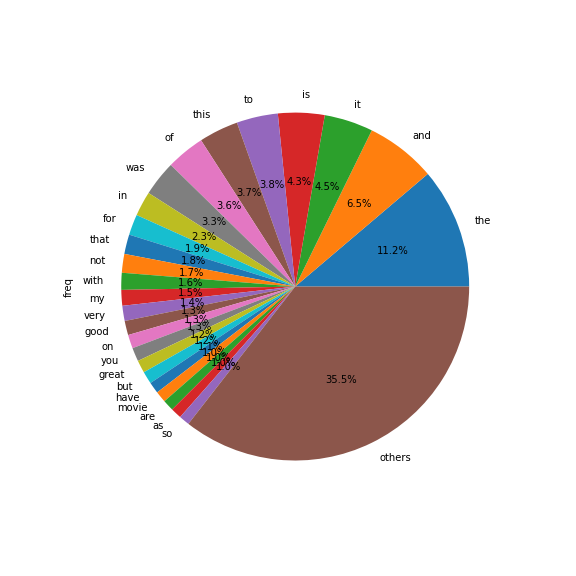

In [312]:
#create piechart visualization
df_pie = pd.DataFrame({'freq': list(term_frequencies)}, index = list(count_vect.get_feature_names_out()))
df_pieplot = df_pie.sort_values(by = 'freq', ascending = False)[:25] # only show top 25 freq term
others = df_pie.freq.sum() - df_pieplot.freq.sum()
df_others = pd.DataFrame({'freq': [others]}, index = ['others'])
df_to_plot = pd.concat([df_pieplot, df_others], axis = 0, ignore_index = False)
plot = df_to_plot.plot.pie(y = 'freq',autopct='%1.1f%%', legend=False, figsize=(8, 8))

here is the top 25 freq terms in pie plot.

### 2. Generate TF-IDF features from the tokens of each text.

In [313]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['sentence'])
print(X.shape)
print(vectorizer.get_feature_names_out())
print(X)

(2983, 5155)
['00' '10' '100' ... 'zillion' 'zombie' 'zombiez']
  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557
  (1, 4861)	0.633627682893175
  (1, 1603)	0.47208678028809276
  (1, 713)	0.512627326445873
  (1, 1993)	0.3359512695758188
  (2, 2449)	0.8223576509783525
  (2, 2023)	0.40205777854454006
  (2, 4531)	0.1950221671536334
  :	:
  (2982, 1387)	0.29330938809811624
  (2982, 5110)	0.29330938809811624
  (2982, 3437)	0.29330938809811624
  (2982, 3857)	0.26883783193000615
  (298

### 3. Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.

### TF-IDF:

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB # better for natural language processing
from sklearn import metrics

train_X, test_X, train_y, test_y = train_test_split(df['sentence'], df['score'], test_size=0.25, random_state = 4200)

# Applying tf vectorizer
tf_vectorizer = TfidfVectorizer()

X_train_tf = tf_vectorizer.fit_transform(train_X)

print("n_samples: %d, n_features: %d" % X_train_tf.shape)

# Transforming test data into tf-vectorized matrix
X_test_tf = tf_vectorizer.transform(test_X)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

# Applying Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, train_y)

# Calculating accuracy and generating classification report from test data
# predict the new document from the testing dataset
y_pred = naive_bayes_classifier.predict(X_test_tf)
# compute the performance measures
score1 = metrics.accuracy_score(test_y, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(test_y, y_pred,
                                            target_names=['Positive', 'Negative']))

n_samples: 2237, n_features: 4395
n_samples: 746, n_features: 4395
accuracy:   0.836
              precision    recall  f1-score   support

    Positive       0.83      0.85      0.84       376
    Negative       0.84      0.82      0.83       370

    accuracy                           0.84       746
   macro avg       0.84      0.84      0.84       746
weighted avg       0.84      0.84      0.84       746



### word frequency:

In [343]:
train_X, test_X, train_y, test_y = train_test_split(df['sentence'], df['score'], test_size=0.25, random_state = 0)
# Applying count vectorizer
count_vectorizer = CountVectorizer()

X_train_tf = count_vectorizer.fit_transform(train_X)

print("n_samples: %d, n_features: %d" % X_train_tf.shape)

# Transforming test data into tf-vectorized matrix
X_test_tf = count_vectorizer.transform(test_X)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

# Applying Naive Bayes
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf, train_y)

# Calculating accuracy and generating classification report from test data
# predict the new document from the testing dataset
y_pred = naive_bayes_classifier.predict(X_test_tf)
# compute the performance measures
score1 = metrics.accuracy_score(test_y, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(test_y, y_pred,
                                            target_names=['Positive', 'Negative']))

n_samples: 2237, n_features: 4328
n_samples: 746, n_features: 4328
accuracy:   0.822
              precision    recall  f1-score   support

    Positive       0.83      0.81      0.82       378
    Negative       0.81      0.83      0.82       368

    accuracy                           0.82       746
   macro avg       0.82      0.82      0.82       746
weighted avg       0.82      0.82      0.82       746



The above results show that **TF-IDF + Naive Bayes Classifier** (accuracy: 0.836) get a better performance than **word frequency + Naive Bayes Classifier** (accuracy: 0.822). By comparing the vectorizer, Word frequency vetorizer only count the term frequency and the document-term matrix is in integer format. On the other hand, TF-IDF also considers document frequency thus its document-term matrix contains decimal. Also, due to this consderation, TF-IDF can minimize the weighting of frequent terms while making infrequent crucial terms have a higher impact, resulting a better performance. 

## Fourth: What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?